In [1]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
# 讀取資料集
iris = datasets.load_iris()
df_data = pd.read_csv('iris.csv')

In [ ]:
#  查看檔案
df_data

In [4]:
# 刪除 標籤ID 因為不參與 運算
df_data = df_data.drop(labels=['Id'], axis=1)

In [5]:
# 調整 Species 的值 改成 012 ，讓決策樹可以計算
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_data['Species']中。
df_data['Class'] = df_data['Species'].map(label_map)

In [6]:
# 檢查缺失值
print("checked missing data(NAN mount):",len(np.where(np.isnan(9))[0]))
# 移除缺失值 train=train.dropna()

checked missing data(NAN mount): 0


# 3) Kmeans是非監督  不用 設定   y=標籤
- X=資料 即可!

In [8]:
X = df_data.drop(labels=['Class','Species'],axis=1).values

# 建立Cluster模型

In [9]:
KM = KMeans(n_clusters=3, random_state=46)
clusters_pred = KM.fit_predict(X)  

評估模型
- .inertia_ 方法 
- within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效
- 越大代表越差

In [10]:
KM.inertia_

78.94084142614601

- .cluster_centers_
- 查看各cluster的中心，並在圖上畫出

In [12]:
KM.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

真實分類

In [ ]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Class', data=df_data, fit_reg=False)

K-mean 後預測結果

In [ ]:
df_data['Predict']=clusters_pred
sns.lmplot("PetalLengthCm", "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False)
plt.scatter(KM.cluster_centers_[:, 2], KM.cluster_centers_[:, 3], s=200,c="r",marker='*')
plt.show()

# 評估 K值
- 法一 .inertia_
- 法二 silhouette scores

法一：一般是取elbow point, 即inertia迅速下降轉為平緩的那個點

In [ ]:
# k = 1~9 做九次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

法二： Silhouette Coefficient 越大代表分群效果越好

In [17]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_list[1:]]

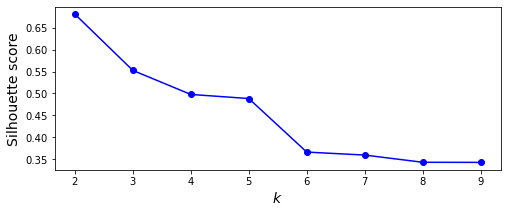

In [18]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()